# Exercise 2

In [1]:
import matplotlib.pyplot as plt
% matplotlib inline
import os
import pandas as pd

In [2]:
# Plot output defaults
IMG_DIR = 'img'
IMG_FORMAT = 'pdf'
IMG_WIDTH = 7 # inches

In [3]:
def save_fig(fig, name, width=IMG_WIDTH, img_dir=IMG_DIR, img_format=IMG_FORMAT):
    """Save `matplotlib.figure.Figure` instance, resized to the specified width"""
    # Resize
    w, h = fig.get_size_inches()
    fig.set_size_inches(width, width/w * h)
    
    fname = '.'.join((os.path.join(img_dir, name), img_format))
    fig.savefig(fname)
    print('Saved:',fname)

## Question 1
Plot calibrated ages versus depth.

In [4]:
df = pd.read_csv('data/nps.csv', index_col=0) # all depths, nps

In [5]:
df = pd.read_csv('data/nps.csv', index_col=0) # all depths, nps
df2 = pd.read_csv('data/age_tie_points.csv', index_col=0) # only tie points

# Mark tie_points
df2['tie_point'] = True
df2 = df2[['tie_point']] # delete redundant age column
df = pd.concat((df, df2), axis=1)
df.ix[:, 'tie_point'].fillna(False, inplace=True)

Saved: img/line_age_depth.pdf


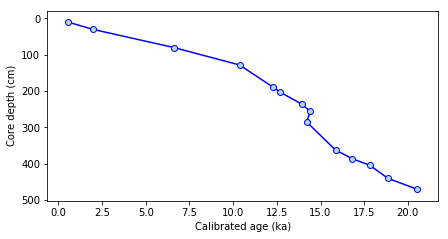

In [6]:
fig, ax = plt.subplots(figsize=(IMG_WIDTH,IMG_WIDTH/2))
age = df['age']/1000. # years to ka
ax.plot(age, df.index, c='blue')
ax.scatter(age[df.tie_point], df[df.tie_point].index,
           c='lightblue', edgecolors='blue',
           zorder=ax.lines[0].get_zorder()+1)
ax.set_xlabel('Calibrated age (ka)')
ax.set_ylabel('Core depth (cm)')
plt.gca().invert_yaxis()

save_fig(fig, 'line_age_depth')

## Question 2
Plot %Nps vs Age. How does it compare to the Greenland ice core records?

In [7]:
df3 = pd.read_csv('data/NGRIP_d18O.csv', index_col=0)

Saved: img/timeseries_nps_ngrip.pdf


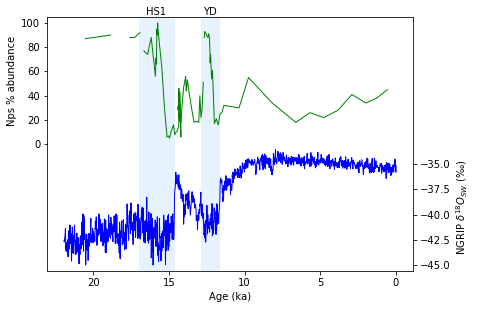

In [8]:
fig, axes = plt.subplots(2, sharex=True,)
axes[0].plot(age, df.nps,
             c='green', linewidth=1)
axes[0].set_ylabel('Nps % abundance')
axes[0].spines['bottom'].set_visible(False)
axes[0].tick_params('x', bottom=False)
axes[0].patch.set_visible(False)

axes[1].plot(df3, c='blue', linewidth=1)
axes[1].set_ylabel('NGRIP $\delta^{18}O_{SW}$ (\u2030)')
axes[1].yaxis.tick_right()
axes[1].yaxis.set_label_position('right')
axes[1].patch.set_visible(False)
axes[1].spines['top'].set_visible(False)

# Mark stadials
for i, (period, bounds) in enumerate([('HS1', (14.7, 17)),
                                      ('YD', (12.9, 11.7))]):
    for j, ax in enumerate(axes):
        ax.axvspan(*bounds, color='#e6f3ff', zorder=i+j)
        if not j:
            xy = ((bounds[0]+bounds[1])/2, ax.get_ylim()[1]-0.05)
            ax.annotate(period, xy, ha='center', va='bottom')

ax.set_xlabel('Age (ka)')
plt.gca().invert_xaxis()
fig.subplots_adjust(hspace=0)
plt.gcf().subplots_adjust(right=0.85) # make some room for ylabel
save_fig(fig, 'timeseries_nps_ngrip')